<a href="https://colab.research.google.com/github/SteffanBurnette/TensorFlow-/blob/main/Another_copy_of_IntroToRegressionModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf #Neural network builder
import pandas as pd  #dataframes maker
import numpy as np #data analysis libary
import matplotlib.pyplot as plt
print("Lets get STARTTED")

Lets get STARTTED


[ True  True  True  True  True  True  True  True]
(8,) (8,)


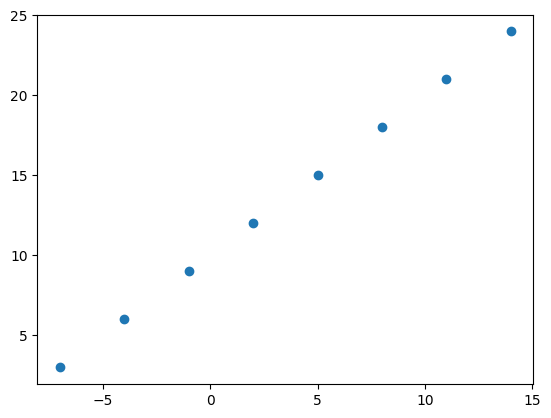

In [ ]:
#Intro to regression models with tensorflow

#Create Features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
#Create Labels
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#Visualize the data
plt.scatter(X, Y) #Uses matplotlib to create a scatter plot of the data given

#Notice that we can get to Y from X by adding 10
#This is the relationship/function between out features and labels that we want the neural network to learn
print(Y==X+10) #Compares each element +10 in the numpy array one by one

input_shape = X.shape
output_shape = Y.shape

print(input_shape, output_shape)
#The shape is 8, 8 but since we only need one feature to predict one labe its one to one
#Also the X and Y tensors are scalar tensors(rank 0) meaning that their dimensions are 0

### Input and Output Shapes

In [ ]:
#Create a demo tensor for then housing price prediction
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price=tf.constant([939700])
house_info, house_price    #Will get their shapes

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
#Corrected Code
# Fit the model
#model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # <- updated line
#The code adds an extra dimension to X on the last axis, turning it ndim=1 to ndim=2 (what the model requires).

In [ ]:
#Turn numpy arrays into tensors
X = tf.constant(X)
Y = tf.constant(Y)
#Gets the shapes of the input and output variables
input_shape = X[0].shape
output_shape = Y[0].shape
#Since its a scalar value, its dimension is 0 so its shape is empty
print(input_shape, output_shape)

() ()


## Steps In Modeling With Tensorflow
1. **Creating a Model** - Define the Input and Output Layers, aswell as the Hidden Layers of a deep learning model.
2. **Compiling the model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use the interpret the performance of the model)
.
3. **Fitting a model** - letting the model try to find patterns between X & Y (features and labels).

In [ ]:
#Sets the seed
tf.random.set_seed(42)

# 1. Creating a model using the Sequential API
#Creates a model by sequentially going through the passed through values in the list
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) #This is 1 because were making a model that takes in 1 number to predict 1 number
])


#Another way to create a model and add layers using the Sequential API
#model = tf.keras.Sequential()
#model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, #mae is short for mean absolute error, used to see on average how wrong are our predictions
              optimizer = tf.keras.optimizers.SGD(), # stochastic gradient descent - Tells our neural network how it should improve
              metrics = ["mae"] #Uses mae as the metric
              )
#3. Fitting the model
#model.fit(X, Y, epochs=5) #five iterations to figure out the patterns/relationships between X and Y

#Corrected Code
# Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=5) # <- updated line
#The code adds an extra dimension to X on the last axis, turning it ndim=1 to ndim=2 (what the model requires).

#4. Use the model to make predictions
#If we have a X value of 17.0, the model will predict what the Y value should be
#Currently pur models prediction is not accurate and will need to be improved
model.predict([17.0])

Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 10.3447 - mae: 10.3447
Epoch 2/5
1/1 [==============================] - 0s 15ms/step - loss: 10.2122 - mae: 10.2122
Epoch 3/5
1/1 [==============================] - 0s 34ms/step - loss: 10.0797 - mae: 10.0797
Epoch 4/5
1/1 [==============================] - 0s 15ms/step - loss: 9.9472 - mae: 9.9472
Epoch 5/5
1/1 [==============================] - 0s 360ms/step


array([[18.350565]], dtype=float32)

### Imporving Our Model
We can improve our model by altering the steps we took to create the model.
1. **Creating A Model** - Here we might want to add more layers, increase the number of hidden units(also called neurons), within each of the hidden layers, change the activation function of each layer.

2. **Compiling A Model** - Here we might change the optimization function or perhaps the **learning rate** of the optimization function.

3. **Fitting A Model** - Here we might fit the model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [ ]:
#Rebuild the model

#1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = "relu"), #uses the relu activation function
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              #optimizer=tf.keras.optimizers.SGD(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), #increased the learning rate to see if the model performs better

              metrics=["mae"])

#3. Train the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 13.7491 - mae: 13.7491
Epoch 2/100
1/1 [==============================] - 0s 22ms/step - loss: 8.2568 - mae: 8.2568
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 3.8841 - mae: 3.8841
Epoch 4/100
1/1 [==============================] - 0s 26ms/step - loss: 6.9273 - mae: 6.9273
Epoch 5/100
1/1 [==============================] - 0s 25ms/step - loss: 6.9793 - mae: 6.9793
Epoch 6/100
1/1 [==============================] - 0s 22ms/step - loss: 5.2580 - mae: 5.2580
Epoch 7/100
1/1 [==============================] - 0s 22ms/step - loss: 3.6583 - mae: 3.6583
Epoch 8/100
1/1 [==============================] - 0s 47ms/step - loss: 4.0828 - mae: 4.0828
Epoch 9/100
1/1 [==============================] - 0s 29ms/step - loss: 3.9263 - mae: 3.9263
Epoch 10/100
1/1 [==============================] - 0s 20ms/step - loss: 2.9698 - mae: 2.9698
Epoch 11/100
1/1 [==============================] - 0s 25ms/step - lo

In [ ]:
#Now lets see if our prediction is more accurate
model.predict([17.0])

1/1 [==============================] - 0s 118ms/step


array([[29.897125]], dtype=float32)

## Evaluating A model
A typical workflow youll go through when building a model is:

```
Build a Model -> Fit the model -> Evaluate it -> Tweak a model -> Fit it -> Evaluate it -> Tweak a model -> Fit it -> Evaluate it....

It is important to visualize things when evaluating a model:
The data- What data are we working with? What does it look like?
The model itself- What does our model look like
The training of a model- How does the model perform while it learns?
The predictions of a model- How do the predictions of a model line up against the ground truth(the original labels)?


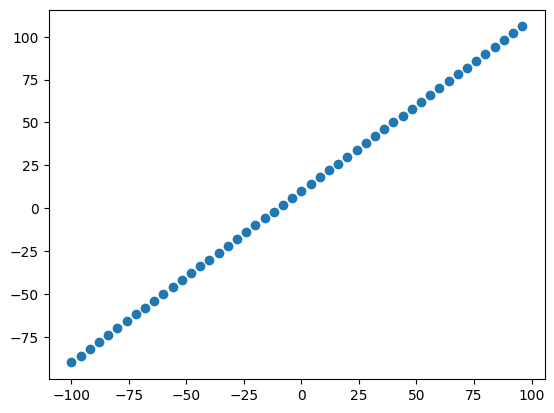

In [ ]:
#Make a bigger dataset
#In a increment of four gets all numbers between -100 to 100
X = tf.range(-100, 100, 4)

#Make labels for the dataset
Y = X+10  # X+10 is the formula we want the model to learn

#Visulizes the data
plt.scatter(X, Y)

### 3 Sets
**Training Set** - The model learns from this data and is typically 70-80% of the total data you have avaliable.

**Validation Set** - The model gets fine tuned on this dataset. Youll test how the tweaks effect the models performance with the validation set. Typically 10-15% of te data avaliable.

**Test Set** - The model gets evaluated on this dataset to test what it has learned. This set is typically 10-15% of the total data avaliable.

The validation set is optinal in some cases but the training and test sets are mandatory.

In [ ]:
#Check the length of the original dataset before splitting it up into sets
print(len(X))

#Split the data into train and test sets
X_train = X[:40] #80% of the data
Y_train = Y[:40]
X_test = X[40:] #The last 10 are teting samples (20% of the data)
Y_test = Y[40:]



50


### Visualizing the New Datasets

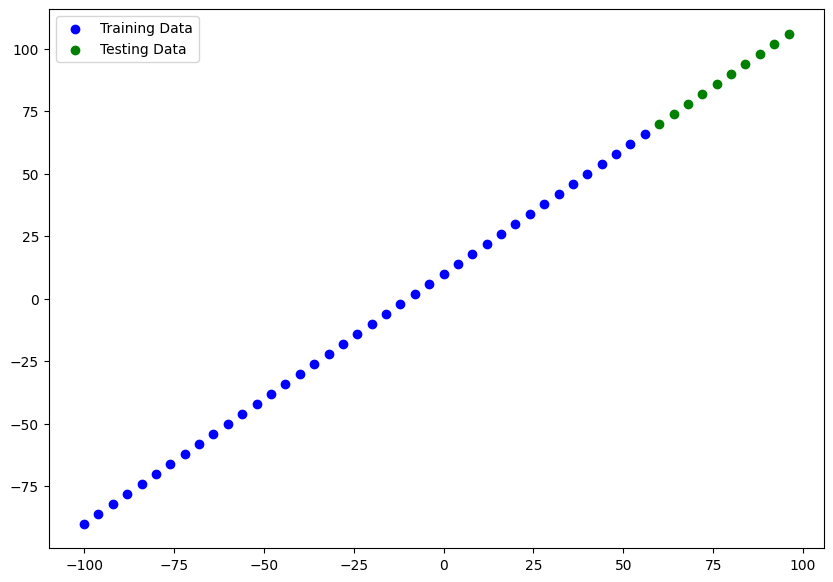

In [ ]:
plt.figure(figsize=(10, 7))

#Plots the x and y training data in blue
plt.scatter(X_train, Y_train, c="b", label="Training Data")
#Plots the x and y testing data in green
plt.scatter(X_test, Y_test, c="g", label="Testing Data")
#Shows a legend that contains the label and associated data
plt.legend();


### Create a Neural network for the data to figureout the correlation between X and Y

In [ ]:
#Creating my neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) #One hidden layer because we are using one x value to predict one y value
])

model.compile( loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate= 0.01),
               metrics = ["mae"]
)

#model.fit(X_train, Y_train, epochs=100)

#model.summary()

#model.predict(X_test, Y_test)

In [ ]:
#Used to build a model based on the input shape recieved. Used as a substitute for calling a model on real data to build it
#model.build()


#Lets create a model that builds automatically by defining the inputshape in the first layer
tf.random.set_seed(42) #Used for reproducible results

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = [1], name="Input_Layer"), #One hidden layer because we are using one x value to predict one y value
    #The input shape is 1 because we are passing through one number from the tensor.
    tf.keras.layers.Dense(1, name="Output_Layer")
], name="The_first_of_many_models_that_will_be_built")

model.compile( loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
               metrics = ["mae"]
)

#Now model.summary will work before we fit the model since the input_shape is specified (The model knows what its input will be before encountering the data)
model.summary()

#Trains the model on the training data
model.fit(X_train, Y_train, epochs=100, verbose=0) #Stops the fitting process from outputing anything

Model: "The_first_of_many_models_that_will_be_built"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 1)                 2         
                                                                 
 Output_Layer (Dense)        (None, 1)                 2         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - Total number of parameters in the model.
* Trainable params- These are the parameters(patterns) that the model can update as it trains.
* Non- Trainable params - These paramters arent updated during training (this is typical when you bring in already learned patterns or parameters from other models during **Transfer Learning**)

Model: "The_first_of_many_models_that_will_be_built"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 1)                 2         
                                                                 
 Output_Layer (Dense)        (None, 1)                 2         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


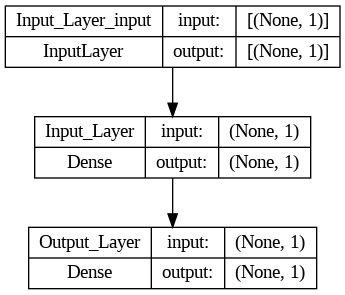

In [ ]:
model.summary()

from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)
#to_file='model_name.png'   saves the plot as an image

### Visualizing our Models Prediction
When visualizing our models predictions its a good idea to plot them against the ground truth labels.

Often, youll see this in the form of `y_test` or `y_true` versus `y_pred`(ground truth versus your models predictions)

In [ ]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 222ms/step


array([[ 69.51578 ],
       [ 74.03423 ],
       [ 78.55269 ],
       [ 83.071144],
       [ 87.5896  ],
       [ 92.108055],
       [ 96.62652 ],
       [101.14497 ],
       [105.66343 ],
       [110.18189 ]], dtype=float32)

If you feel like your going to reuse some sort of functionality in the future its a good idea to create a function.

In [ ]:
def plot_predictions(train_data=X_train, train_labels=Y_train, test_data=X_test, test_labels=Y_test, predictions=y_pred):
     #Plots training data, test data and compares predictions to ground truth labels
     plt.figure(figsize=(10,7))
     #Plot training data in blue
     plt.scatter(train_data, train_labels, c="b", label="Training Data")
     #Plot testing data in green
     plt.scatter(test_data, test_labels, c="g", label="Testing Data")
     #plot predictions in red
     plt.scatter(test_data, predictions, c="r", label="Predictions")
     plt.legend();


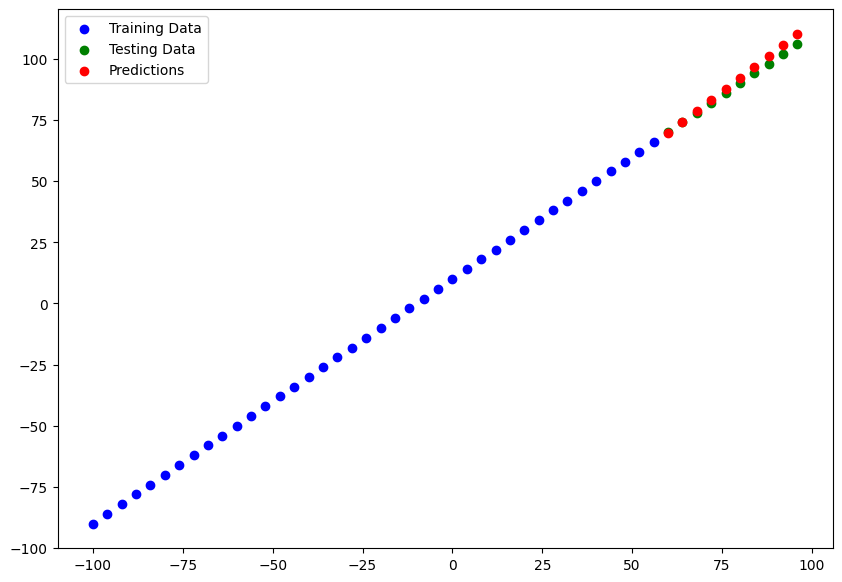

In [ ]:
plot_predictions(train_data=X_train, train_labels=Y_train, test_data=X_test, test_labels=Y_test, predictions=y_pred)

### Evaluating our Model with regression evaluation metrics

Depending on the problem your working on, there will be different evaluation metrics to evaluate your models performance.

Since we're working on regression two of the main metrics are:
* MAE- Mean Absolute Error- On average, how wrong are my models predictions.
*MSE-Mean Square Error- Take the errors from the models predictions, square them and then find the average.


In [ ]:
model.evaluate(X_test, Y_test)


1/1 [==============================] - 0s 484ms/step - loss: 1.9457 - mae: 1.9457


[1.9456756114959717, 1.9456756114959717]

### Calculating The Mean Absolute Error

In [ ]:
#Calculate the mean absolute error manually
mae = tf.metrics.mean_absolute_error(y_true=Y_test, y_pred=y_pred)
print(mae) #We obtain a metric for each of our test labels and predictions
#If we ever want to comapare tensors they need to be in the same format/shape so that we can properly perform the dot product.

tf.Tensor(
[18.484222 14.77946  12.178925 10.585772 10.       10.421611 11.850607
 14.286984 17.730743 22.181892], shape=(10,), dtype=float32)


In [ ]:
#We use tf.squeeze to remove the 1 dim in y_pred shape so that the mean absolute error can be calculated properly
mae = tf.metrics.mean_absolute_error(y_true=Y_test, y_pred=tf.squeeze(y_pred))
print(mae)

tf.Tensor(1.9456756, shape=(), dtype=float32)


### Calculating the Mean Square Error

In [ ]:
#Calculate the Mean Square Error
mse = tf.metrics.mean_squared_error(y_true=Y_test, y_pred=tf.squeeze(y_pred))
print(mse)

tf.Tensor(5.635758, shape=(), dtype=float32)


In [ ]:
#A Function thats used to predict MSE and MAE
def predict_mae_mse(y_true, y_pred):
    mae =tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))
    mse = tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))
    return("Mean Absolute Error: ",mae, "Mean Squared Error: ",mse)

def mae(y_true, y_pred):
      return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
        return tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

In [ ]:
print(predict_mae_mse(Y_test,tf.squeeze(y_pred)))

('Mean Absolute Error: ', <tf.Tensor: shape=(), dtype=float32, numpy=1.9456756>, 'Mean Squared Error: ', <tf.Tensor: shape=(), dtype=float32, numpy=5.635758>)


### Running Experiments to improve our model
1. Get more data- get more examples for your model to train on (more opprotunities to learn patterns or relationships between features and labels)
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer- give your model more of a chance to find patterns in the data.

Lets do 3 modeling experiments:
`model_1`- same as original model, 1 layer trained for 100 epochs.
`model_2` - 2 layers, trained for 100 epochs.
`model_3` - 2 layers, trained for 500 epochs.

**Build `model_1`**

In [ ]:


#Set the random seed for as much reproducability as possible
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1], name="Input_Layer")
], name="model_1")

model_1.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"]
                )
model_1.fit(X_train, Y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 21ms/step - loss: 103.5700 - mae: 103.5700
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 68.1145 - mae: 68.1145
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 30.7038 - mae: 30.7038
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 9.9056 - mae: 9.9056
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.8607 - mae: 10.8607
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 10.0447 - mae: 10.0447
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0881 - mae: 9.0881
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.1168 - mae: 9.1168
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 19.9911 - mae: 19.9911
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 10.8252 - mae: 10.8252
Epoch 11/100
2/2 [==============================] - 0s 6ms/s

1/1 [==============================] - 0s 41ms/step


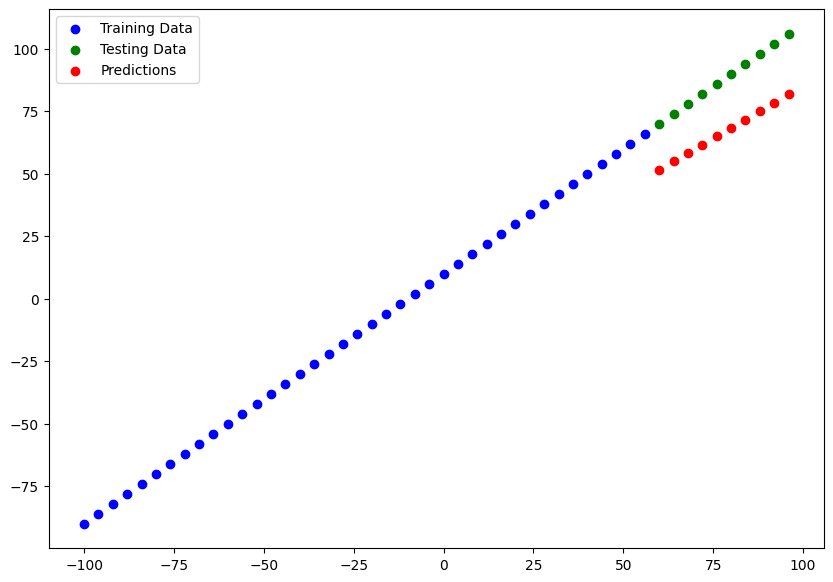

In [ ]:
#Make and plot predictions with model_1
#Using the test data since the model has never seen it before and we want to see how well it performs on unseen data
y_preds_model_1 = model_1.predict(X_test)
plot_predictions(predictions= y_preds_model_1)

In [ ]:
#Calculate model_1 evaluation metrics:
mae_1 = mae(Y_test, y_preds_model_1)
mse_1 = mse(Y_test, y_preds_model_1)
print("Mean Absolute Error of model_1: ", mae_1, "Mean Squared Error of model_1: ", mse_1)

Mean Absolute Error of model_1:  tf.Tensor(21.348328, shape=(), dtype=float32) Mean Squared Error of model_1:  tf.Tensor(459.20874, shape=(), dtype=float32)


**Build `model_2`**  - 2 dense layers, trained for 100 epochs

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, input_shape=[1], name="output_layer")
], name="model_2")

model_2.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mse"])

model_2.fit(X_train, Y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 13ms/step - loss: 51.1133 - mse: 4104.6787
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 21.8517 - mse: 750.5097
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 19.4213 - mse: 550.6162
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 14.0468 - mse: 257.8136
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 15.6257 - mse: 316.1050
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 12.3945 - mse: 195.3570
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 11.6752 - mse: 167.4294
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 12.0769 - mse: 199.2036
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 37.8320 - mse: 2207.2339
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 25.4476 - mse: 908.9386
Epoch 11/100
2/2 [===========================

1/1 [==============================] - 0s 44ms/step
tf.Tensor(29.618567, shape=(), dtype=float32) tf.Tensor(908.21564, shape=(), dtype=float32)


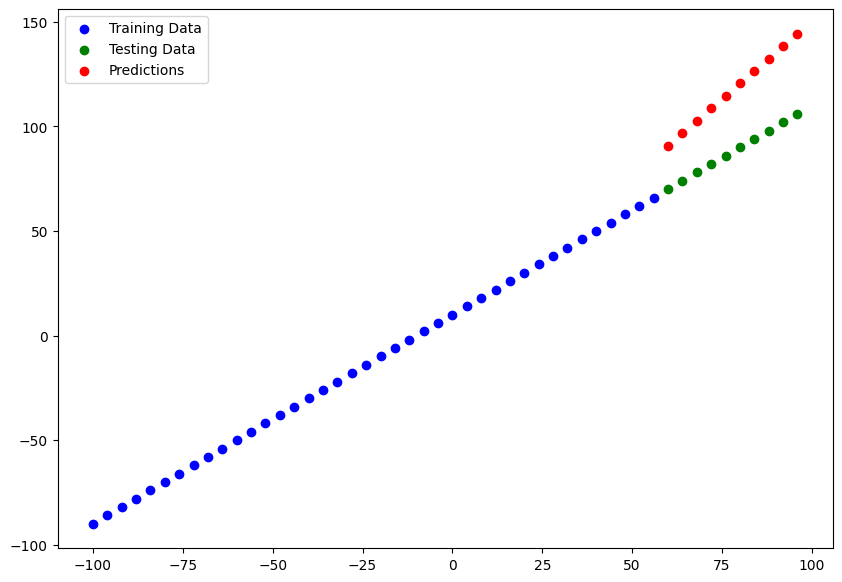

In [ ]:
#Make and plot model2 predictions
y_pred_model_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_model_2)

#Calculate model_2 evaluation metrics
mse_2 = mse(Y_test, y_pred_model_2)
mae_2 = mae(Y_test, y_pred_model_2)
print(mae_2, mse_2)


**Build `model_3`**
* 2 Layers
* 500 epochs

In [ ]:
tf.random.set_seed(42)
#Create theb model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1] ,name="Input_3"),
    tf.keras.layers.Dense(1,input_shape=[1],  name="Output_3")
], name="Model_3")

#compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

#fit the model
model_3.fit(X_train,Y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 11ms/step - loss: 31.7142 - mae: 31.7142
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 20.8382 - mae: 20.8382
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 27.5370 - mae: 27.5370
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 24.4652 - mae: 24.4652
Epoch 5/500
2/2 [==============================] - 0s 6ms/step - loss: 12.9824 - mae: 12.9824
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 10.4982 - mae: 10.4982
Epoch 7/500
2/2 [==============================] - 0s 9ms/step - loss: 11.4316 - mae: 11.4316
Epoch 8/500
2/2 [==============================] - 0s 6ms/step - loss: 11.1347 - mae: 11.1347
Epoch 9/500
2/2 [==============================] - 0s 6ms/step - loss: 41.3840 - mae: 41.3840
Epoch 10/500
2/2 [==============================] - 0s 10ms/step - loss: 28.6645 - mae: 28.6645
Epoch 11/500
2/2 [==============================] - 0s 6m

1/1 [==============================] - 0s 117ms/step
tf.Tensor(66.99599, shape=(), dtype=float32) tf.Tensor(4570.8804, shape=(), dtype=float32)


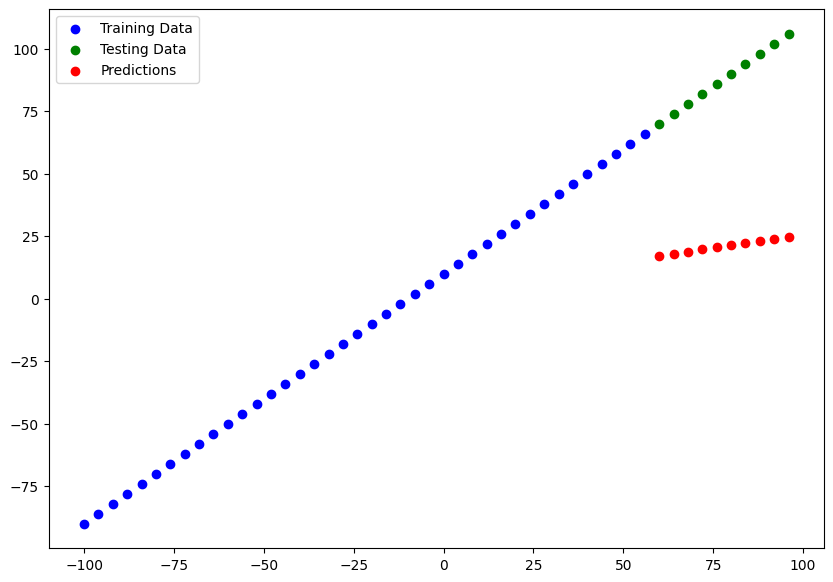

In [ ]:
#Visualize the models predictions
y_preds_model_3 = model_3.predict(X_test) #Run predictions on the test dataset
plot_predictions(predictions=y_preds_model_3)

#Calculate models prediction metrics
mae_3 = mae(Y_test, y_preds_model_3)
mse_3 = mse(Y_test, y_preds_model_3)
print(mae_3, mse_3)

### Comparing the Results of our model
* How can we organize and compare the performance results of our models

In [ ]:
#Lets compare our models results by using a pandas dataframe

#First lets store our models results in a list of lists
model_results = [["Model_1", mae_1.numpy(), mse_1.numpy()],
                 ["Model_2", mae_2.numpy(), mse_1.numpy()],
                 ["Model_3",mae_3.numpy(), mse_3.numpy()]]  #.numpy() in this case returns only the numeric values within the tensor since its converted to numpy array

#Places our results in a dataframe and specifies columns name to have data stored in a readable manner
all_results = pd.DataFrame(model_results, columns=["Model", "mae", "mse"])

print(all_results)

     Model        mae          mse
0  Model_1  21.348328   459.208740
1  Model_2  29.618567   459.208740
2  Model_3  66.995987  4570.880371


In [ ]:
model_1.summary()
model_2.summary()
model_3.summary()
#Looks like model 2 performed the best

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
__________________________________________

**One of the main goal in ML in to minimize the time between experiments. The more experiments you do, the more things youll figure out which dont work. In turn when you figure out what doesnt work, youll get closer to figuring out what does work. Remember the machine learning practitioners motto: Experiment, Experiment, Experiment**

### Tracking Your Experiment
One really good habit in machine learning modeling is to track the results of your experiments. When doing so it can be tedious if your running lots of experiments. Luckily, there are tools for that.

**Resources -**As You build more models youll want to look into:
* **TensorBoard** - A component of the tensorflow libary that helps track modeling experiments.(A `TensorFlow` visualization toolkit)
* **Weights & Biases** - A tool for tracking all kinds of machine learnin experiments(plugs straight into `TensorBoard`).


### Saving our models
Saving our models allows us to use them outside of google colab (or where ever they were trained) such as in a web application or a mobile app.

*An entire model can be saved in three different file formats (the new `.keras `format and two legacy formats: `SavedModel`, and `HDF5`). Saving a model as path/to/model.keras automatically saves in the latest format.
* Note: For Keras objects it's recommended to use the new high-level .keras format for richer, name-based saving and reloading, which is easier to debug. The low-level SavedModel format and legacy H5 format continue to be supported for existing code.

In [ ]:
#Saves model using .keras format
model_2.save('my_model_save_test.keras')

#Saves model using savemode format (good for if your using this model only in tensorflow)
model_2.save('my_model_save_test')

#Saves model in HDF5 format (good for if you want to use the model outside of tensorflow). This is considered old and .keras is now preferred
model_2.save('my_model_save_test.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Loading a saved model

In [ ]:
loaded_saved_model = tf.keras.models.load_model("my_model_save_test.keras")
loaded_saved_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_2_preds = model_2.predict(X_test)
loaded_save_model_preds = loaded_saved_model.predict(X_test)

#The saved model is the same as the original model so no need for anything lost
print(model_2_preds == loaded_save_model_preds)

1/1 [==============================] - 0s 16ms/step
[[ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]]


### Creating a Regression Model thats trained on a larger dataset
**Medical Cost Dataset** - We will use the data provided in this dataset to predict the medical cost that one may endure.

In [ ]:
#Import the required libaries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  #Used to create training and testing sets


In [ ]:
#pd.read_csv will read the csv from the 'raw' github hyperlink
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
print(insurance)
#We want to understand the relationship between the features(age, sex, bmi, children, smoker, region) and the label(charges)



      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


### Converting the data in the dataset so that the model can analyze it

* First we will have to convert all the non numerical data into numerical data.To do so we will implement **One Hot Encoding**.


In [ ]:
#Used the one hot encode the specified column of the given dataframe. Prefix is optional
pd.get_dummies(insurance["sex"], prefix="Gender")

#Uses on hot encoding on all non numeric categorical data in the dataframe
insurance_one_hot = pd.get_dummies(insurance)

print(insurance_one_hot.head())

   age     bmi  children      charges  sex_female  sex_male  smoker_no  \
0   19  27.900         0  16884.92400           1         0          0   
1   18  33.770         1   1725.55230           0         1          1   
2   28  33.000         3   4449.46200           0         1          1   
3   33  22.705         0  21984.47061           0         1          1   
4   32  28.880         0   3866.85520           0         1          1   

   smoker_yes  region_northeast  region_northwest  region_southeast  \
0           1                 0                 0                 0   
1           0                 0                 0                 1   
2           0                 0                 0                 1   
3           0                 0                 1                 0   
4           0                 0                 1                 0   

   region_southwest  
0                 1  
1                 0  
2                 0  
3                 0  
4                 

### Create the X and Y variable from the dataset so that we can make training and testing datasets

In [ ]:
X = insurance_one_hot.drop("charges", axis=1) #Assigns all the columns but the dropped chrages column to the X variable
Y = insurance_one_hot["charges"] #Assigns only the charges column to the Y variable

#Visualize the data
print(X.head(), Y.head())

   age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
0   19  27.900         0           1         0          0           1   
1   18  33.770         1           0         1          1           0   
2   28  33.000         3           0         1          1           0   
3   33  22.705         0           0         1          1           0   
4   32  28.880         0           0         1          1           0   

   region_northeast  region_northwest  region_southeast  region_southwest  
0                 0                 0                 0                 1  
1                 0                 0                 1                 0  
2                 0                 0                 1                 0  
3                 0                 1                 0                 0  
4                 0                 1                 0                 0   0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype

### Creating the Testing and Training Datasets from the Features(X) and the Labels(Y)

In [ ]:
#Notice that X is a matrix and Y is a vector
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
#We need to set the random state to make sure that the data is split in the same way each time
#We say that the test_size=0.2 so the the train test split is 80%-20%

len(X), len(X_train), len(X_test)

(1338, 1070, 268)

### Create a neural network to take in the data and preform predictions

In [ ]:
#Set the seed for reproducibility
tf.random.set_seed(42)

#1. Create the model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

#3 Train/fit the model to the data
insurance_model.fit(X_train, Y_train, epochs=100)
#Pandas is built on top of numpy, so you can think of a dataframe as a big numpy array. That also means that where numpy
#arrays can be used, pandas dataframes can be used meaning that pandas is very compatible with tensorflow


Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8656.5312 - mae: 8656.5312
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7884.8916 - mae: 7884.8916
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7594.0073 - mae: 7594.0073
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7684.7881 - mae: 7684.7881
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7728.2764 - mae: 7728.2764
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7664.3315 - mae: 7664.3315
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7536.2207 - mae: 7536.2207
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7796.6685 - mae: 7796.6685
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7489.7583 - mae: 7489.7583
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7666.4727 - mae: 7666.4727

In [ ]:
#Check the results of the test data on the insurance model
insurance_model.evaluate(X_test, Y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8576.0508 - mae: 8576.0508


[8576.05078125, 8576.05078125]

Right now our model is not performing the best.
To try and improve our model we will try 2 experiments:
1. Add another hidden layer to our model and use the adam optimizer
2. Train our model longer

In [ ]:
#Set the seed for reproducibility
tf.random.set_seed(42)

#1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
#The model was to complex for the sgd optimizer which resulted in nan, so adam was used instead
                        metrics=["mae"])

#3 Train/fit the model to the data
insurance_model_2.fit(X_train, Y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 5ms/step - loss: 13303.0059 - mae: 13303.0059
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13162.6221 - mae: 13162.6221
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12859.9502 - mae: 12859.9502
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 12251.4678 - mae: 12251.4678
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 11196.1641 - mae: 11196.1641
Epoch 6/100
34/34 [==============================] - 0s 8ms/step - loss: 9766.2666 - mae: 9766.2666
Epoch 7/100
34/34 [==============================] - 0s 8ms/step - loss: 8362.8232 - mae: 8362.8232
Epoch 8/100
34/34 [==============================] - 0s 6ms/step - loss: 7589.6670 - mae: 7589.6670
Epoch 9/100
34/34 [==============================] - 0s 5ms/step - loss: 7432.6064 - mae: 7432.6064
Epoch 10/100
34/34 [==============================] - 0s 7ms/step - loss: 7409.7803 - mae:

In [ ]:
insurance_model_2.evaluate(X_test, Y_test)

9/9 [==============================] - 0s 2ms/step - loss: 5052.5991 - mae: 5052.5991


[5052.59912109375, 5052.59912109375]

In [ ]:
insurance_model.evaluate(X_test, Y_test)

9/9 [==============================] - 0s 8ms/step - loss: 7360.6050 - mae: 7360.6050


[7360.60498046875, 7360.60498046875]

In [ ]:
#Set the seed for reproducibility
tf.random.set_seed(42)

#1. Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
#The model was to complex for the sgd optimizer which resulted in nan, so adam was used instead
                        metrics=["mae"])

#3 Train/fit the model to the data
history = insurance_model_3.fit(X_train, Y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13319.6406 - mae: 13319.6406
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13201.9297 - mae: 13201.9297
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12927.4053 - mae: 12927.4053
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12349.4453 - mae: 12349.4453
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 11322.9453 - mae: 11322.9453
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9890.8721 - mae: 9890.8721
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8449.2354 - mae: 8449.2354
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7613.8423 - mae: 7613.8423
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7440.4961 - mae: 7440.4961
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7416.4121 - mae:

In [ ]:
insurance_model_3.evaluate(X_test, Y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3507.5764 - mae: 3507.5764


[3507.576416015625, 3507.576416015625]

Text(0.5, 0, 'epochs')

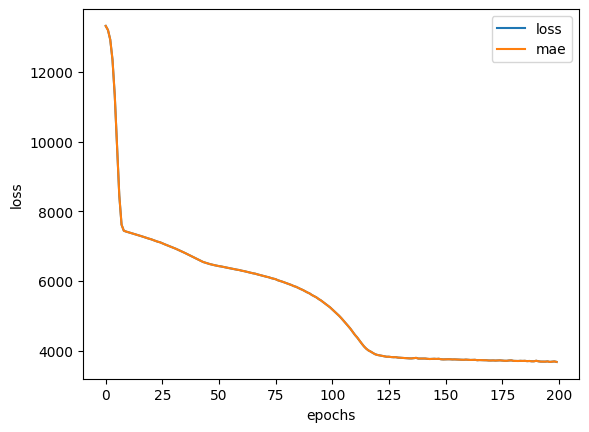

In [ ]:
#Plot your models training history (Also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
#When training ourt neural networks, we want the loss curve to go down because that means that the predictions our model
#is making is becoming less and less wrong

**Question**: How long should you train for?
*  It depends.It depends on the problem your working on.However, people have asked this question before so tensorflow has a solution! Its called the `Early Stopping Callback`: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping , Which is a tensorflow component that you cn add t your model to stop training once it stops improving.


### Preprocessing data(Normalization and Standardization)
**`Normalization`**- Changing the values of numeric columns in a dataset to a common scale. Also known as `Scale Features` or `Scale`. Its often used as the Default scaler with neural networks.
For Instance, with our X variable, while all the columns are now numeric the scale of those numbers do not correlate with each other(for example one column has a range of 0-1 while another has a range of 10-80). By scaling the dataset, we will convert all the values to 0-1 while keeping the distribution the same.
* In terms of scaling values, neural networks tend to prefer scaling values(normalization).

In [ ]:
!pip install sklearn

In [ ]:
#Import the required libaries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split  #Used to create training and testing sets
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split  #Used to create training and testing sets

#pd.read_csv will read the csv from the 'raw' github hyperlink
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
print(insurance)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [ ]:
#Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(),["age", "bmi", "children"]),#turns all values in thses columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
     #handle_unknown="ignore" just tells the oneHotEncoder to ignore any columns it doesnt know about
)

#Create variable
X = insurance.drop("charges", axis=1)
Y = insurance["charges"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

#Fit the column transformer to the training data. Whenever you have a column transformer
#you want to fit it to the training data, and then use the column fit transformer to fit the test data.
ct.fit(X_train)

#Transform training and test data with normalization(MinMaxScaler and OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
#What does our data look like now
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

### Our data has been normalized and one hot encoded, now lets build a neural network and see how it goes.

In [ ]:
#Set the seed to have reproducivility
tf.random.set_seed(42)

#Build a neural network for our normalized data
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_4.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ["mae"])

insurance_model_4.fit(X_train_normal, Y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 7s 16ms/step - loss: 13344.3145 - mae: 13344.3145
Epoch 2/100
34/34 [==============================] - 1s 16ms/step - loss: 13336.9678 - mae: 13336.9678
Epoch 3/100
34/34 [==============================] - 1s 18ms/step - loss: 13318.6367 - mae: 13318.6367
Epoch 4/100
34/34 [==============================] - 1s 15ms/step - loss: 13278.8848 - mae: 13278.8848
Epoch 5/100
34/34 [==============================] - 0s 10ms/step - loss: 13205.8838 - mae: 13205.8838
Epoch 6/100
34/34 [==============================] - 0s 9ms/step - loss: 13088.1768 - mae: 13088.1768
Epoch 7/100
34/34 [==============================] - 0s 11ms/step - loss: 12915.0957 - mae: 12915.0957
Epoch 8/100
34/34 [==============================] - 0s 8ms/step - loss: 12676.4697 - mae: 12676.4697
Epoch 9/100
34/34 [==============================] - 0s 6ms/step - loss: 12362.0938 - mae: 12362.0938
Epoch 10/100
34/34 [==============================] - 0s 6ms/step - loss: 11

In [ ]:
#Evaluate our model on the normalized data. We need to make sure to evaluate our model on the same type of data that it recieved.
#So because we trained it on normalized data, we need to evaluate it on normalized data
insurance_model_4.evaluate(X_test_normal, Y_test)
#By normalizing our data we see and decrease in the loss metric meaning that our model is performing better.
#Typically, when we normalize our data out model tends to converg faster(Get better results faster)

9/9 [==============================] - 0s 9ms/step - loss: 3436.9202 - mae: 3436.9202


[3436.920166015625, 3436.920166015625]